# Assignment 2


*   Tanja Gurtner - 17-677-295
*   Cyrill Georg Meier - 17-552-316

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from PIL import Image

## Preparation
Upload files / Mount your drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Get all existing files

In [17]:
dir_str = '/content/drive/MyDrive/uni/network/assignments/assignment2/data/' # Tanja
dir_str = '/content/drive/MyDrive/Assignement 2/data' # Cyrill
directory = os.fsencode(dir_str)

files = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".gml"):
        files.append(os.path.join(dir_str, filename))
        continue
    else:
        continue

Read all the files and add to dict `graphs`

In [18]:
graphs = {}
for file_path in files:
  file_name = os.path.splitext(os.path.basename(file_path))[0]
  graphs[file_name] = nx.read_gml(file_path)

In [19]:
graphs

{'graph_AstroPh': <networkx.classes.graph.Graph at 0x79daa2f14820>,
 'graph_game_thrones': <networkx.classes.graph.Graph at 0x79daa2f17eb0>,
 'graph_eu_airlines': <networkx.classes.graph.Graph at 0x79daa2f15360>,
 'graph_celegansInteractomes': <networkx.classes.graph.Graph at 0x79daa2f162f0>,
 'graph_chess': <networkx.classes.graph.Graph at 0x79daa2f17010>,
 'graph_jazz_collab': <networkx.classes.graph.Graph at 0x79daa2f148b0>,
 'graph_internet': <networkx.classes.graph.Graph at 0x79daa2f14f70>}

In [20]:
def plot_network_graph(G):
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', font_size=12, font_weight='bold')
    plt.show()

## Exercise 1
(1 point) Plot a scatter plot with the average degree of the nearest neighbours $k_{nn}(k)$ against the degree.

In [21]:
def generate_scatter_plot(x,y,xlabel,ylabel,title=None):
  plt.figure(figsize=(8, 6))
  plt.scatter(x, y, color='r', alpha=0.5, edgecolor='b')

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.grid(True)
  plt.savefig(f'{dir_str}ex1_plot_{title}.png')
  plt.show()

For all the given graph, we do the following:

1. **Calculate Metrics**: `avg_neighbor_degree` gets the average neighbor degree for each node. `avg_node_degree` extracts each node's degree from `G`.

2. **Plot**: `generate_scatter_plot` creates a scatter plot for each graph showing node degree versus average neighbor degree.

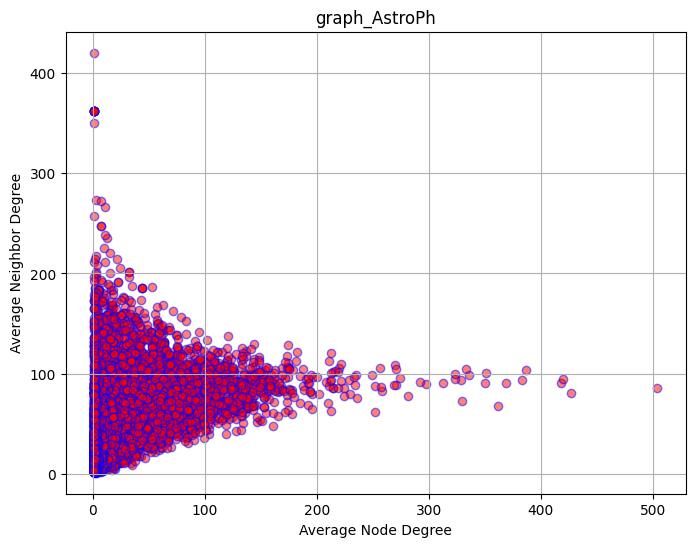

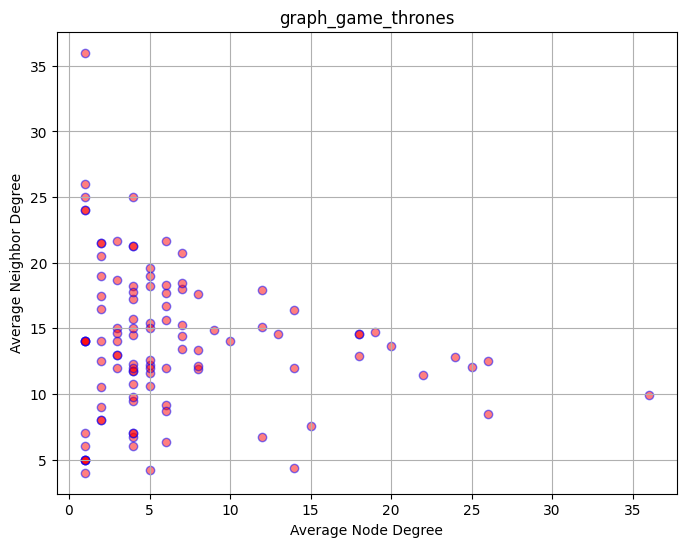

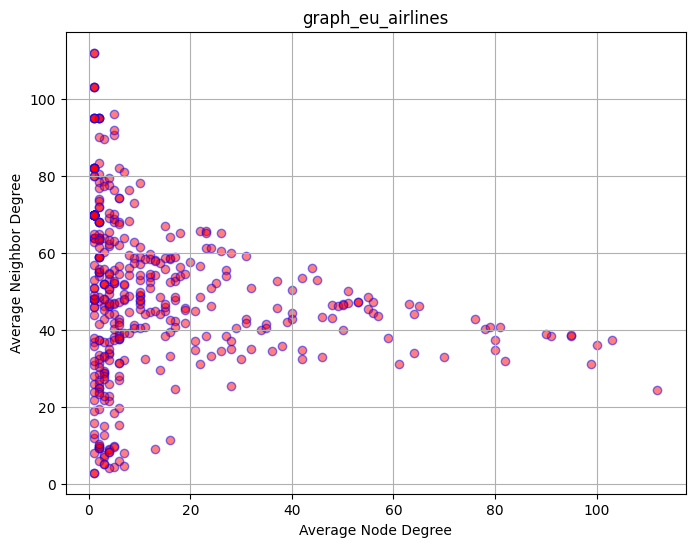

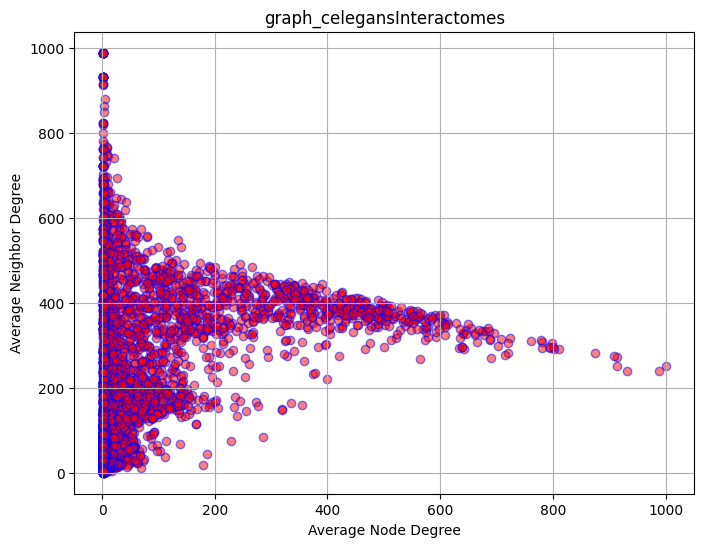

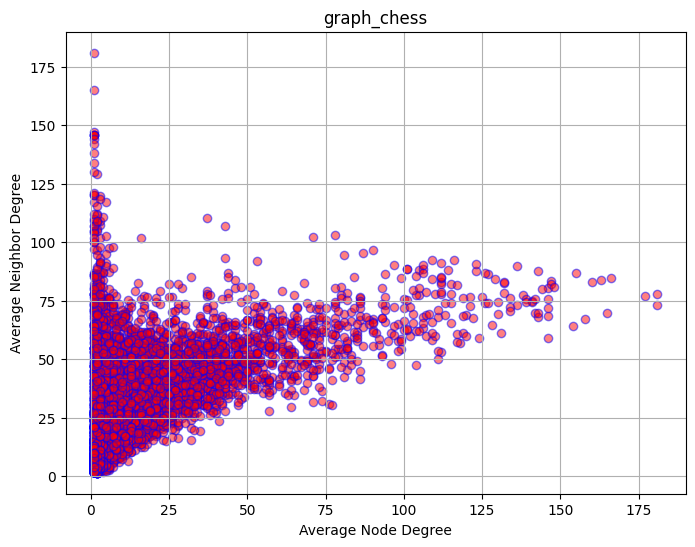

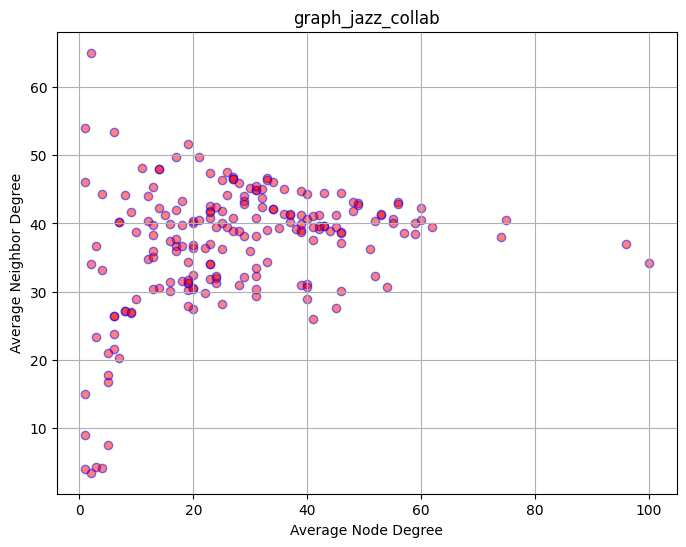

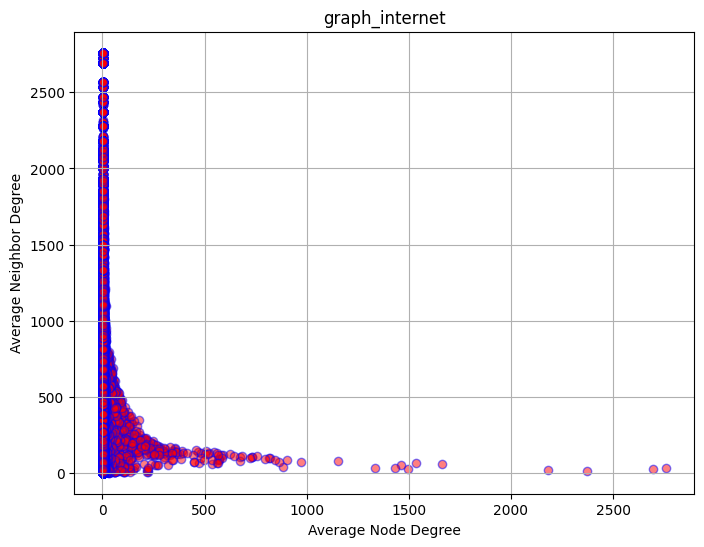

In [22]:
for name, G in graphs.items():
  avg_neighbor_degree = nx.average_neighbor_degree(G)
  avg_node_degree = {k: G.degree[k] for k in avg_neighbor_degree}

  generate_scatter_plot(
      x=avg_node_degree.values(),
      y=avg_neighbor_degree.values(),
      xlabel='Average Node Degree',
      ylabel='Average Neighbor Degree',
      title=name
      )

## Exercise 2
(1 point) Plot the same scatter plot from question 1 but using a randomised version of the network. Plot the distribution in the same figure together with the scatter plot you obtained in question 1.

Hint: The randomised networks are obtained via multiple edge swaps via the networkx function: nx.algorithms.smallworld.random_reference. Make sure to set the parameter connectivity = False to have faster execution

[NetworkX Smallworld](https://networkx.org/documentation/stable/reference/algorithms/smallworld.html)

First, the randomised networks of each graph are obtained and stored in a separate dictionary with parallel structure to `graphs`.

In [23]:
graphs_randomized = {}
for k,v in graphs.items():
  graphs_randomized[k] = nx.random_reference(v, niter=1, connectivity=False, seed=None)

Then we define a function to calculate the average neighbor degree and the node degree for each node.

We use `nx.average_neighbor_degree(graph)` to compute the average degree of the neighbors for each node in the graph. The result is a dictionary where each key is a node, and the value is the average degree of its neighboring nodes.

Then we store the node degree for each node in a dictionary and return both dictionaries of metrics.

In [24]:
def get_metrics(graph):
    avg_neighbor_degree = nx.average_neighbor_degree(graph)
    avg_node_degree = {k: graph.degree[k] for k in avg_neighbor_degree}
    return avg_node_degree, avg_neighbor_degree

Next for each graph, we do the following:

1. **Calculating Metrics for Original Graph**:
   - We call call the `get_metrics` function for the original graph, returning dictionaries for the degrees of each node (`avg_node_degree`) and the average degree of their neighbors (`avg_neighbor_degree`).
   - `x1` and `y1` are assigned the values from these dictionaries, which will be plotted on the x and y axes.

2. **Calculating Metrics for Randomized Graph**:
   - The same process is repeated for the randomized version of the graph.
   - `x2` and `y2` are the values for the randomized graph, to be plotted alongside the original.

3. **Plotting**:
   - We then create two scatter plots: one for the original graph (red points) and one for the randomized graph (blue points), which allows as to compare the degree distributions of each original graph and its randomized counterpart in the same plot.

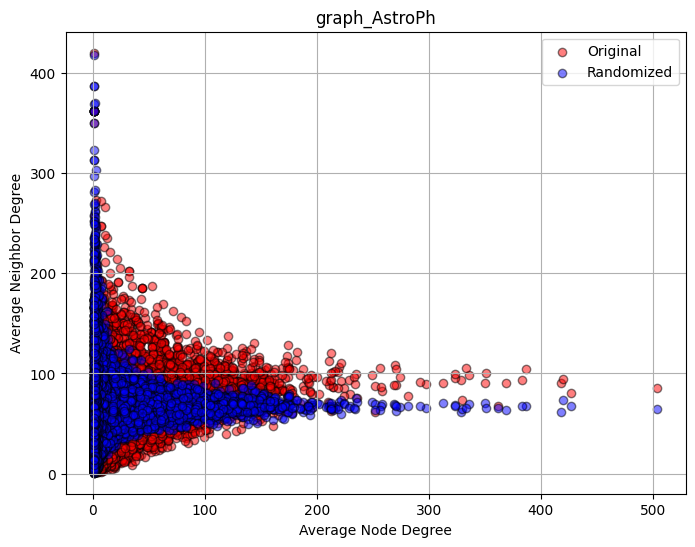

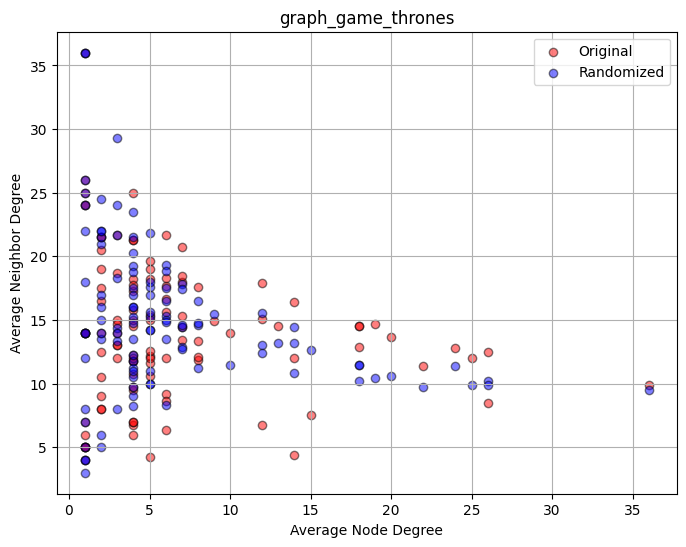

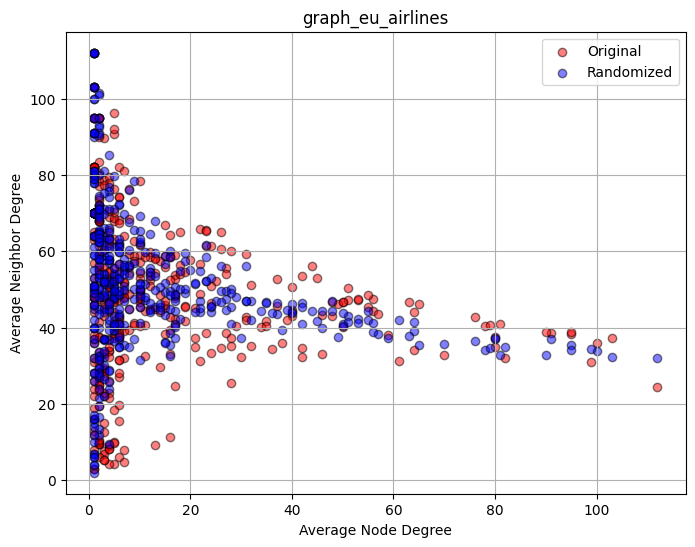

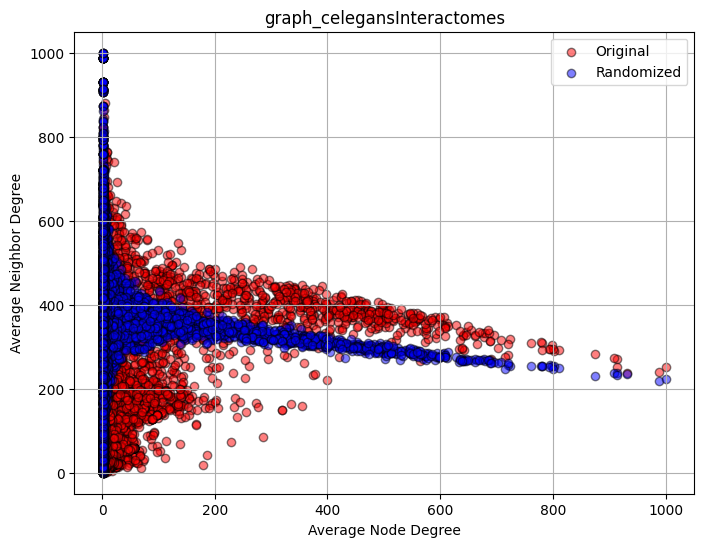

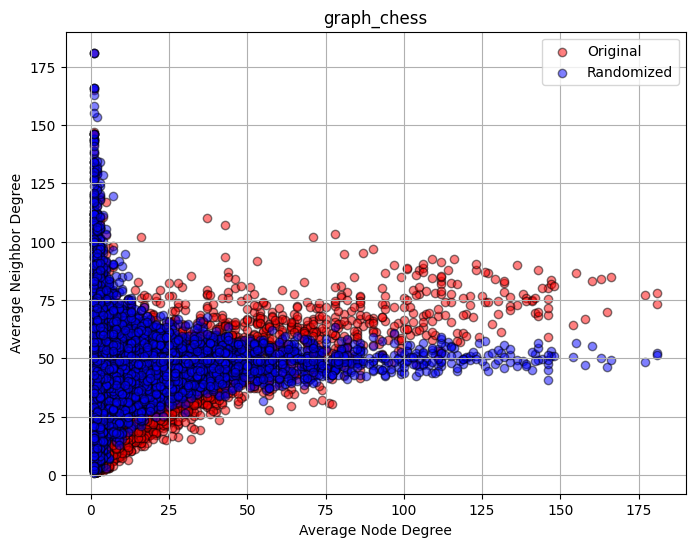

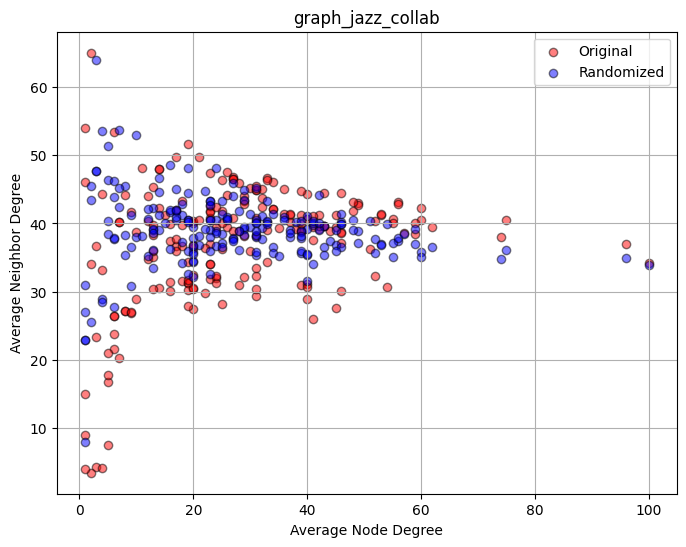

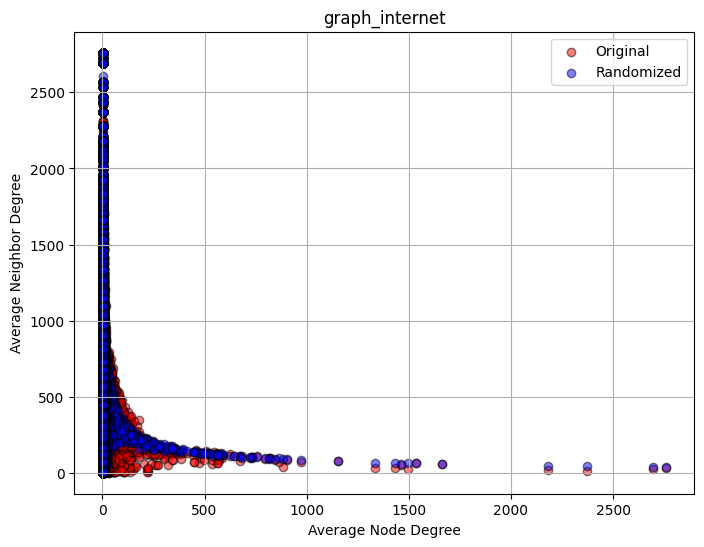

In [25]:
for name, G in graphs.items():

  # Original
  avg_node_degree, avg_neighbor_degree = get_metrics(G)
  x1 = avg_node_degree.values()
  y1 = avg_neighbor_degree.values()

  # Randomized
  avg_node_degree2, avg_neighbor_degree2 = get_metrics(graphs_randomized[name])
  x2 = avg_node_degree2.values()
  y2 = avg_neighbor_degree2.values()

  # Plot
  plt.figure(figsize=(8, 6))
  plt.scatter(x1, y1, label='Original', color='r', alpha=0.5, edgecolor='k')
  plt.scatter(x2, y2, label='Randomized', color='b', alpha=0.5, edgecolor='k')

  xlabel='Average Node Degree'
  ylabel='Average Neighbor Degree'
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(name)
  plt.legend()
  plt.grid(True)

  plt.savefig(f'{dir_str}ex2_plot_{name}.png')

  plt.show()



## Exercise 3
3. (1 point) Compute the assortativity coefficient of the real network and the randomized network. Put the computed assortativity values in the plot labels of the figure you created in question 2.

We use the same code as before, but we extend it by calculation the assortativity coefficient and including it in the labels.

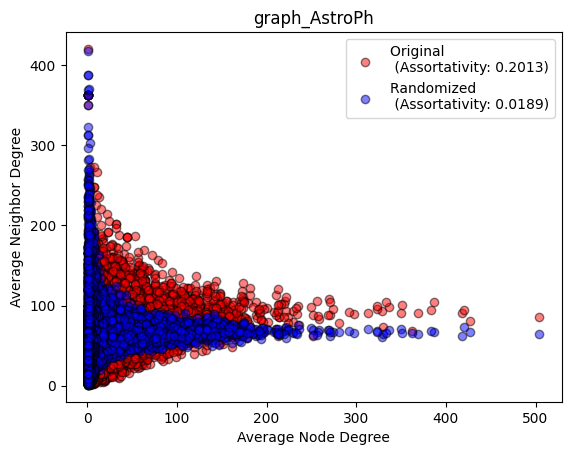

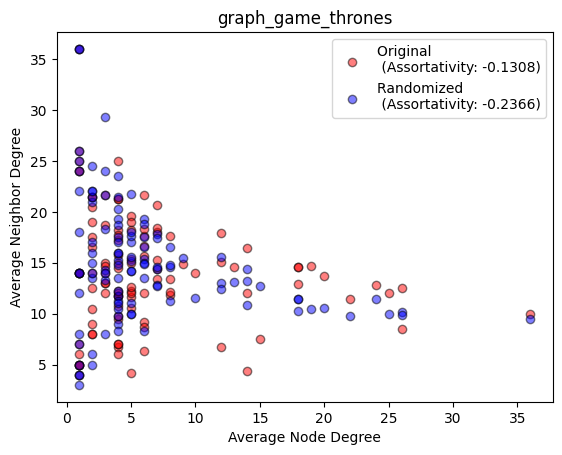

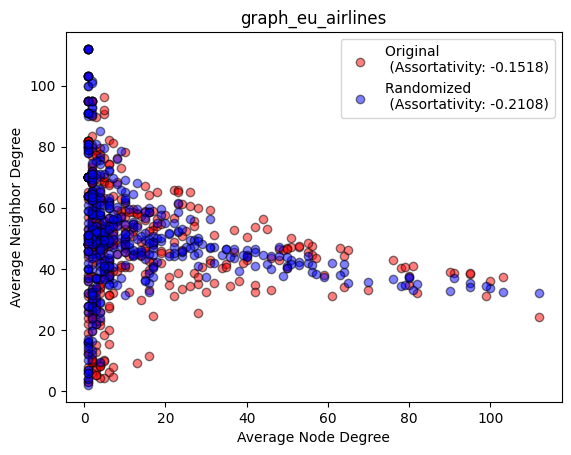

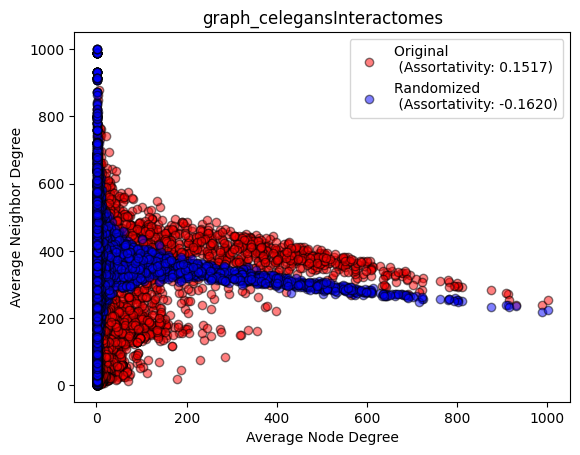

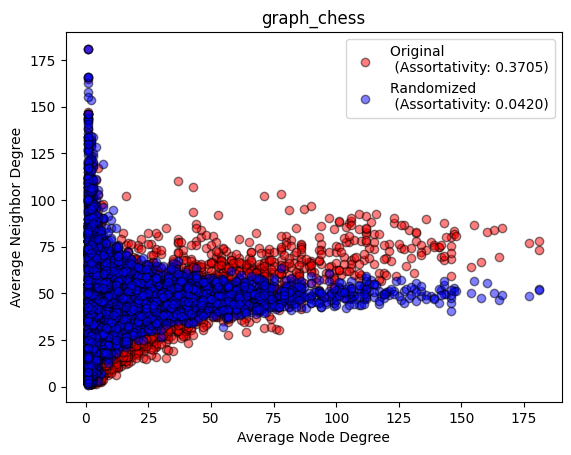

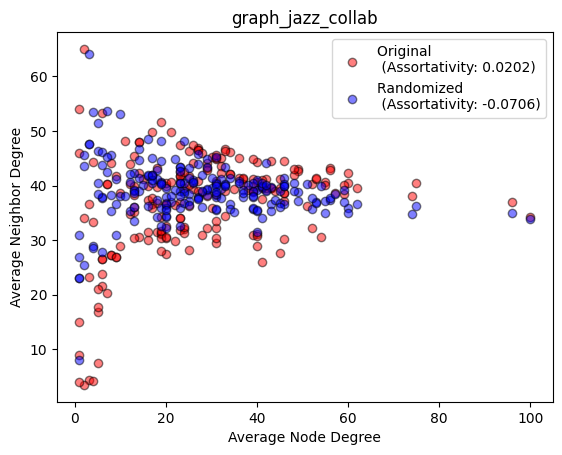

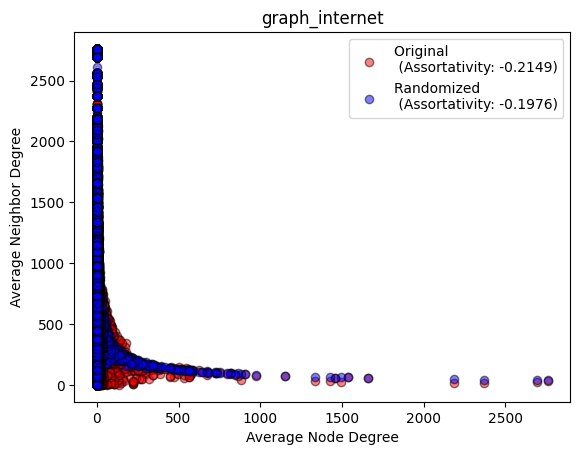

In [26]:
for name, G in graphs.items():
  # Original
  avg_node_degree, avg_neighbor_degree = get_metrics(G)
  x1 = avg_node_degree.values()
  y1 = avg_neighbor_degree.values()

  r1 = nx.degree_assortativity_coefficient(G)

  # Randomized
  avg_node_degree2, avg_neighbor_degree2 = get_metrics(graphs_randomized[name])
  x2 = avg_node_degree2.values()
  y2 = avg_neighbor_degree2.values()

  r2 = nx.degree_assortativity_coefficient(graphs_randomized[name])

  plt.scatter(x1, y1, label=f'Original \n (Assortativity: {r1:.4f})', color='r', alpha=0.5, edgecolor='k')
  plt.scatter(x2, y2, label=f'Randomized \n (Assortativity: {r2:.4f})', color='b', alpha=0.5, edgecolor='k')

  xlabel='Average Node Degree'
  ylabel='Average Neighbor Degree'
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.title(name)
  plt.legend()

  plt.savefig(f'{dir_str}ex3_plot_{name}.png')
  plt.show()

## Exercise 4
4. (1 point) Plot the probability density of degree values $p(k) = P(k_i = k) \in [0, 1] \forall i \in V$. Use a logarithmic binning and adjust the axis scales accordingly. Hint: look into plt.hist() documentation

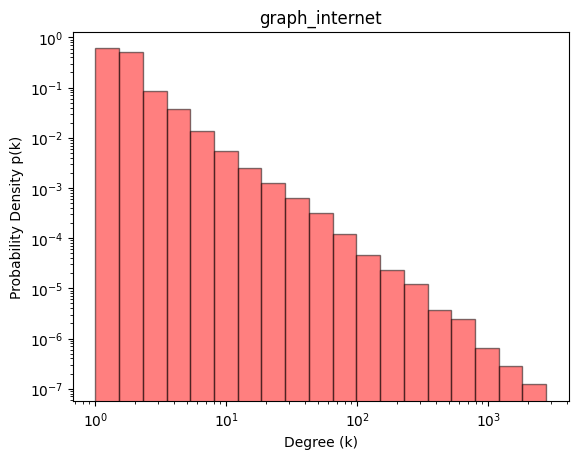

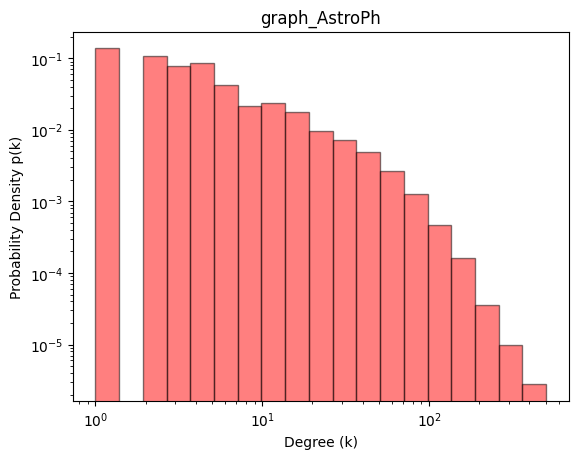

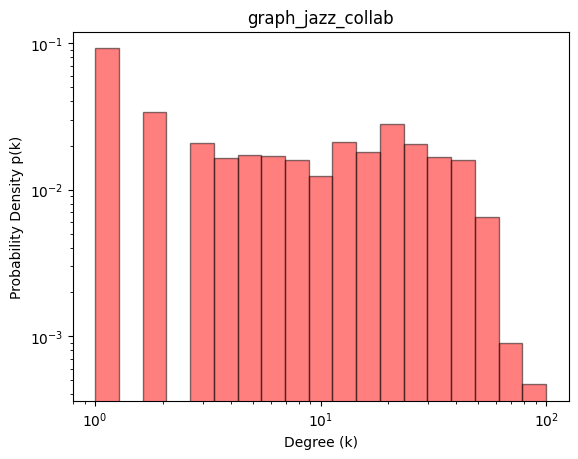

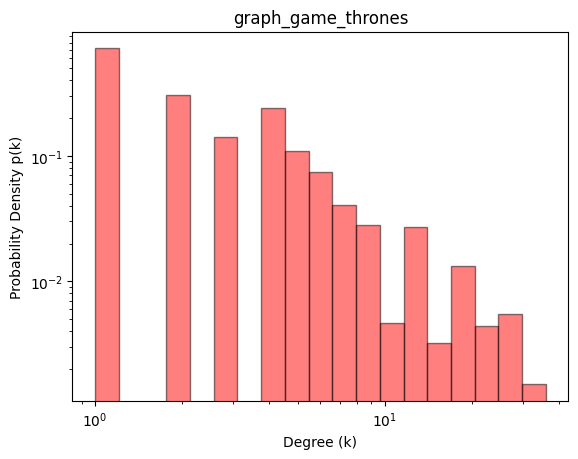

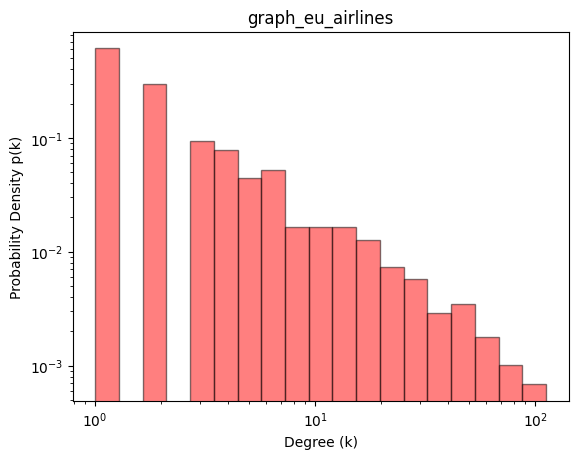

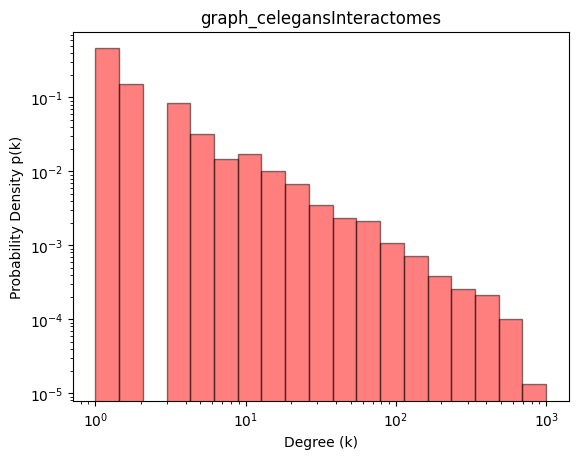

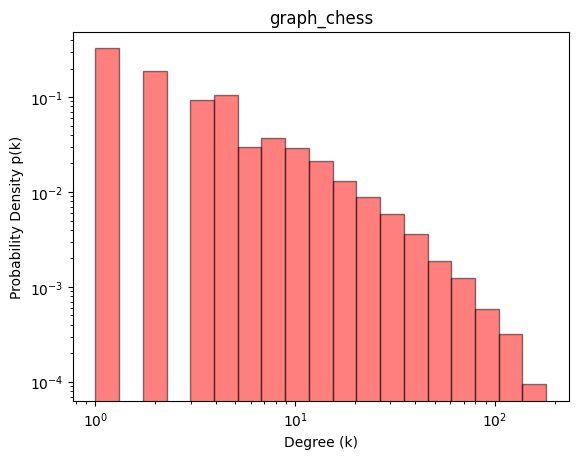

In [ ]:
for name, G in graphs.items():
  # Original
  degrees = [deg for node, deg in G.degree()]

  # Randomized
  #degrees2 = [deg for node, deg in graphs_randomized[name].degree()]

  degree_counts = np.bincount(degrees)
  probability_density = degree_counts / len(G.nodes)

  bins = np.logspace(np.log10(1), np.log10(max(degrees)), num=20)

  plt.figure()
  plt.hist(degrees, bins=bins, density=True, color='r', alpha=0.5, edgecolor='k')

  plt.xscale('log')
  plt.yscale('log')

  plt.xlabel('Degree (k)')
  plt.ylabel('Probability Density p(k)')
  plt.title(name)

  plt.savefig(f'{dir_str}ex4_plot_{name}.png')
  plt.show()

## Exercise 5
5. (1 point) For each network, provide a short comment on the plots you produced in the previous 4 questions. Decide whether a Network is assortative or disassortative. Explain your rationale.

### Assortativity Coefficient
The assortativity coefficient quantifies network assortativity as the Pearson correlation between the degrees of connected node pairs. A positive coefficient indicates assortativity, while a negative one suggests disassortativity (Menczer et al., 2020).

In [ ]:
for k,v in graphs.items():
  r = nx.degree_assortativity_coefficient(v)
  result = ""
  if r >= 0:
    result = "assortativity"
    i = "positive"
  else:
    result = "disassortativity"
    i = "negative"

  print(f"Network '{k}': The assorativity coefficient {r} is {i} and therefore indicates {result}.")

Network 'graph_internet': The assorativity coefficient -0.21486656615730235 is negative and therefore indicates disassortativity.
Network 'graph_AstroPh': The assorativity coefficient 0.20131706127372678 is positive and therefore indicates assortativity.
Network 'graph_jazz_collab': The assorativity coefficient 0.020237399275047713 is positive and therefore indicates assortativity.
Network 'graph_game_thrones': The assorativity coefficient -0.1307696836693023 is negative and therefore indicates disassortativity.
Network 'graph_eu_airlines': The assorativity coefficient -0.15180413274193835 is negative and therefore indicates disassortativity.
Network 'graph_celegansInteractomes': The assorativity coefficient 0.15169796960230705 is positive and therefore indicates assortativity.
Network 'graph_chess': The assorativity coefficient 0.3705153782729769 is positive and therefore indicates assortativity.


Let's plausibilize this indication by looking at the plots produced before for each network.

In [ ]:
image_paths = {}
image_paths4 = {}
for k,v in graphs.items():
  image_paths[k] = dir_str + 'ex3_plot_' + k + '.png'
  image_paths4[k] = dir_str + 'ex4_plot_' + k + '.png'

### graph_internet
Relationship between node degree and average neighbor of network:

* We observe that high degree nodes generally connect to low degree nodes. For low degree nodes we don't see a clear pattern as they connect to neighbors with varying degree's.

Comparison Relationship between node degree and average neighbor of network to Relationship between node degree and average neighbor of randomized network:

* The randomized network exhibits similar patterns.



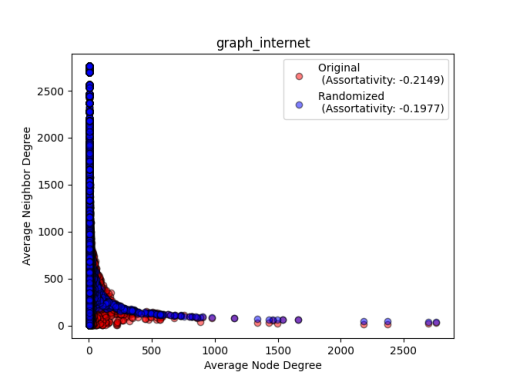

In [ ]:
img = Image.open(image_paths['graph_internet'])
plt.imshow(img)
plt.axis('off')
plt.show()

### graph_AstroPh
Relationship between node degree and average neighbor of network:

* We observe that nodes generally connect to nodes fith a similar degree. With a wider variety when looking at low degree nodes.

Comparison Relationship between node degree and average neighbor of network to Relationship between node degree and average neighbor of randomized network:

* The randomized network has a very low positive coefficient, close to zero, which implies almost no assortative tendency. This indicates that the assortativity observed in the original network is not due to randomness but is an inherent structural property.


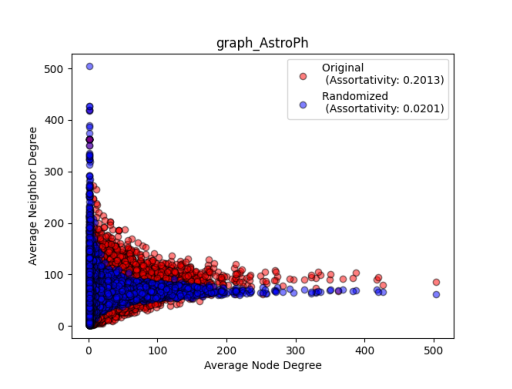

In [ ]:
img = Image.open(image_paths['graph_AstroPh'])
plt.imshow(img)
plt.axis('off')
plt.show()

### graph_jazz_collab
Relationship between node degree and average neighbor of network:
* We see a relatively relatively flat distribution, indicating that there is no clear relationship between node degree and the average neighbor degree.

Comparison Relationship between node degree and average neighbor of network to Relationship between node degree and average neighbor of randomized network:
* The distribution of the random network looks similar, indicating randomness assortativity.


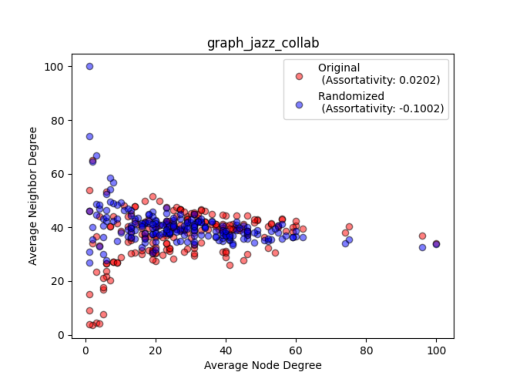

In [ ]:
img = Image.open(image_paths['graph_jazz_collab'])
plt.imshow(img)
plt.axis('off')
plt.show()

### graph_game_thrones
Relationship between node degree and average neighbor of network:
* There is no clear trend that would indicate assortativity/disassortativity

Comparison Relationship between node degree and average neighbor of network to Relationship between node degree and average neighbor of randomized network:
* The original and randomized networks overlap significantly. This also supports that the network does not have strong assortative or disassortative tendencies.

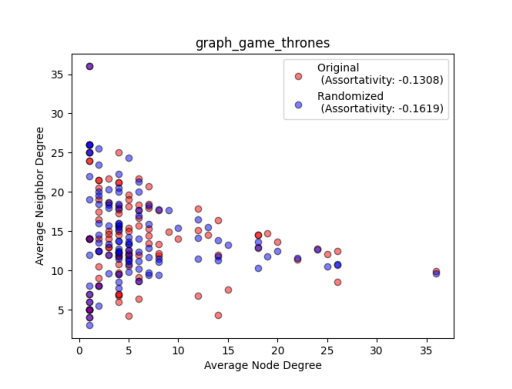

In [ ]:
img = Image.open(image_paths['graph_game_thrones'])
plt.imshow(img)
plt.axis('off')
plt.show()

### graph_eu_airlines
Relationship between node degree and average neighbor of network:
* There's a wide spread among lower node degrees connecting to other nodes. The spread decreases as the node degree gets higher and there's less variation in the average neighbor degree of higher degree nodes.

* Higher degree nodes stabilize around 40-60.

* There is a slight dissortative tendency.

Comparison Relationship between node degree and average neighbor of network to Relationship between node degree and average neighbor of randomized network:
* the randomized network shows a similar pattern, which indicates that the original network does not have a strong tendencies.


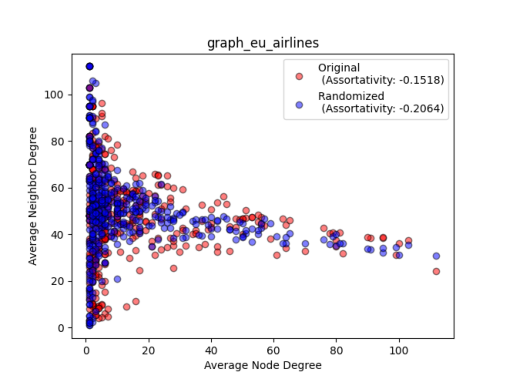

In [ ]:
img = Image.open(image_paths['graph_eu_airlines'])
plt.imshow(img)
plt.axis('off')
plt.show()

### graph_celegansInteractomes
Relationship between node degree and average neighbor of network:
* High-degree nodes seem to have a tendency to connect with low-degree nodes, indicating a disassortative tendency.

* For low-degree nodes there is no cler pattern, they seem to connect with different and similar node degrees.

Comparison Relationship between node degree and average neighbor of network to Relationship between node degree and average neighbor of randomized network:
* In the randomized network, the average neighbor degree decreases more consistently as the node degree increases, suggesting that the randomized network amplifies the disassortative nature, as randomization often connects high-degree nodes to more varied nodes.

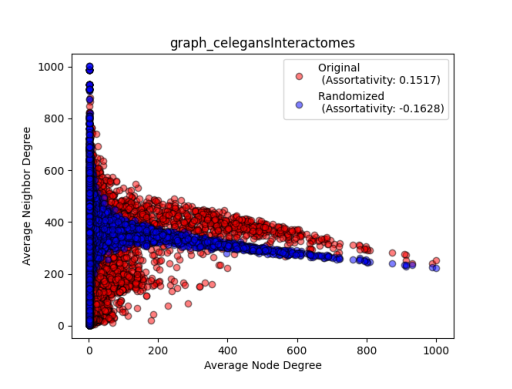

In [ ]:
img = Image.open(image_paths['graph_celegansInteractomes'])
plt.imshow(img)
plt.axis('off')
plt.show()

### graph_chess
Relationship between node degree and average neighbor of network:
* There's a tendency that high degree nodes connect to nodes with a lower degree. This indicates a disassortative tendency.

* Again for lower degree nodes there's no clear tendency.

Comparison Relationship between node degree and average neighbor of network to Relationship between node degree and average neighbor of randomized network:
* The distribution of the random network is less spread and shows rather a tendency for a weak assortative network.


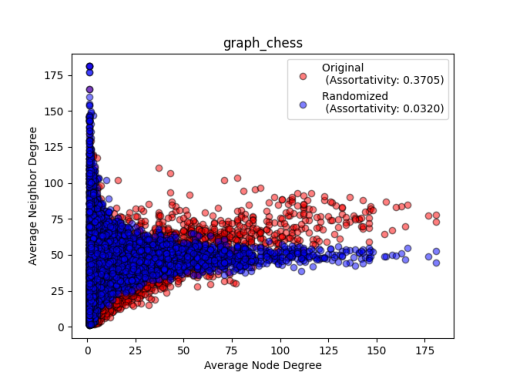

In [ ]:
img = Image.open(image_paths['graph_chess'])
plt.imshow(img)
plt.axis('off')
plt.show()

## Exercise 6
(1 point) Find a dataset representing a disassortative or assortative network. Provide a clear description of the network’s origin and nature, and explain why your network would exhibit assortative/disassortative behavior (Support your claim by repeating the task you performed for question 1‑5).

Network's Origin and nature:
The network was found on [this GitHub Repository](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/datasets/socfb-Northwestern25/socfb-Northwestern25.edges.gz).
The nodes represent facebook users and the edges represent the friend relationships between them.



In [ ]:
G = nx.read_edgelist(dir_str+'socfb-Northwestern25.edges')

In [ ]:
r = nx.degree_assortativity_coefficient(G)
print(f"assorativity coefficient: {r}")

assorativity coefficient: 0.03444129080711028


The assortativity is slightly positive, indicating (weak) assortativity.
To fully understand this number, let's visually interpret it by first looking at the scatter plot with the average degree of the nearest neighbours $knn(k)$ against the degree.

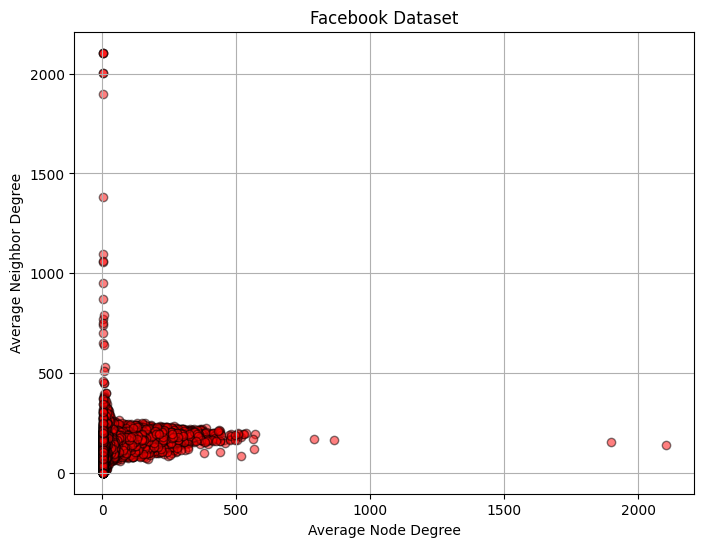

In [ ]:
avg_neighbor_degree = nx.average_neighbor_degree(G)
avg_node_degree = {k: G.degree[k] for k in avg_neighbor_degree}

generate_scatter_plot(
    x=avg_node_degree.values(),
    y=avg_neighbor_degree.values(),
    xlabel='Average Node Degree',
    ylabel='Average Neighbor Degree',
    title='Facebook Dataset'
    )

By visually interpreting the relationship between node degree and average neighbor degree on the plot above, we observe no correlation. We can observe that the values are clustered indicating that most low-degree nodes are connected to other low-degree nodes. This suggests that the networks is neither strongly assortative nor disassortative.

Next, let's create a randomised version of `G` `Gr`and plot the average degree of the nearest neighbours knn(k) against the degree, and compare it to `G`.

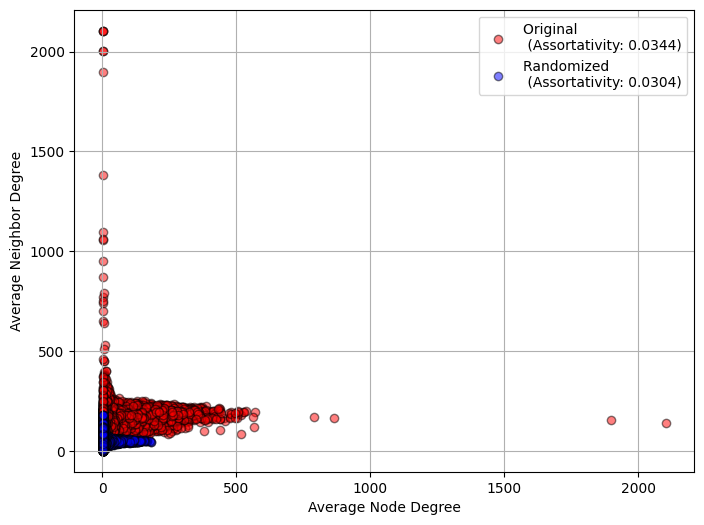

In [ ]:
# Original
avg_node_degree, avg_neighbor_degree = get_metrics(G)
x1 = avg_node_degree.values()
y1 = avg_neighbor_degree.values()
r1 = nx.degree_assortativity_coefficient(G)

# Randomized
Gr = nx.random_reference(v, niter=1, connectivity=False, seed=None)
avg_node_degree2, avg_neighbor_degree2 = get_metrics(Gr)
x2 = avg_node_degree2.values()
y2 = avg_neighbor_degree2.values()
r2 = nx.degree_assortativity_coefficient(Gr)

# Plot
plt.figure(figsize=(8, 6))

plt.scatter(x1, y1, label=f'Original \n (Assortativity: {r1:.4f})', color='r', alpha=0.5, edgecolor='k')
plt.scatter(x2, y2, label=f'Randomized \n (Assortativity: {r2:.4f})', color='b', alpha=0.5, edgecolor='k')

xlabel='Average Node Degree'
ylabel='Average Neighbor Degree'
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.legend()
plt.grid(True)

plt.savefig(f'ex6_plot.png')
plt.show()

By comparing the plot with the distribution of a randomized network, we observe no significant difference. The small positive coefficient for both networks also indicate no strong assortative tendencies. As the assortativity coefficient of the original and randomized network coefficients are very close together, we conclude that that any assortative tendency present in the real network is likely due to randomness rather than an inherent network characteristic.

## References

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge: Cambridge


## Export this ipynb file as pdf


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [31]:
!cp '/content/drive/MyDrive/Assignement 2/assignment2_CM.ipynb' ./


In [32]:
!jupyter nbconvert --to PDF "assignment2_CM.ipynb"

[NbConvertApp] Converting notebook assignment2_CM.ipynb to PDF
[NbConvertApp] Support files will be in assignment2_CM_files/
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_files
[NbConvertApp] Making directory ./assignment2_CM_f